In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as data
import datetime as dt


In [2]:
start='2010-01-01'
end='2019-12-31'
df = data.DataReader('AAPL', 'stooq')
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-01-29,192.01,192.2000,189.5800,191.73,47145622.0
2024-01-26,194.27,194.7600,191.9400,192.42,44594011.0
2024-01-25,195.22,196.2675,193.1125,194.17,54822126.0
2024-01-24,195.42,196.3800,194.3400,194.50,53631316.0
2024-01-23,195.02,195.7500,193.8299,195.18,42355590.0


In [3]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2019-02-06,42.1375,42.3628,41.7098,42.0428,1.170340e+08
2019-02-05,41.7128,42.2441,41.5861,42.0278,1.496168e+08
2019-02-04,40.3938,41.4177,40.3658,41.3239,1.305279e+08
2019-02-01,40.2881,40.7737,40.0399,40.1794,1.353873e+08
2019-01-31,40.0837,40.7787,39.7059,40.1625,1.688383e+08


In [4]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume
0,2024-01-29,192.01,192.2000,189.5800,191.73,47145622.0
1,2024-01-26,194.27,194.7600,191.9400,192.42,44594011.0
2,2024-01-25,195.22,196.2675,193.1125,194.17,54822126.0
3,2024-01-24,195.42,196.3800,194.3400,194.50,53631316.0
4,2024-01-23,195.02,195.7500,193.8299,195.18,42355590.0


In [5]:
df=df.drop(['Date'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,192.01,192.2000,189.5800,191.73,47145622.0
1,194.27,194.7600,191.9400,192.42,44594011.0
2,195.22,196.2675,193.1125,194.17,54822126.0
3,195.42,196.3800,194.3400,194.50,53631316.0
4,195.02,195.7500,193.8299,195.18,42355590.0


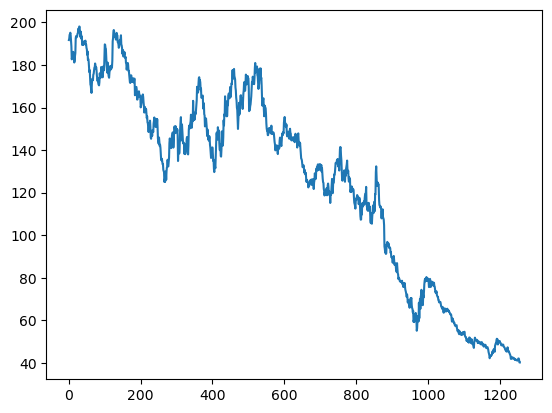

In [6]:
plt.plot(df.Close)

In [7]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1252    45.805791
1253    45.744618
1254    45.671979
1255    45.587745
1256    45.513621
Name: Close, Length: 1257, dtype: float64

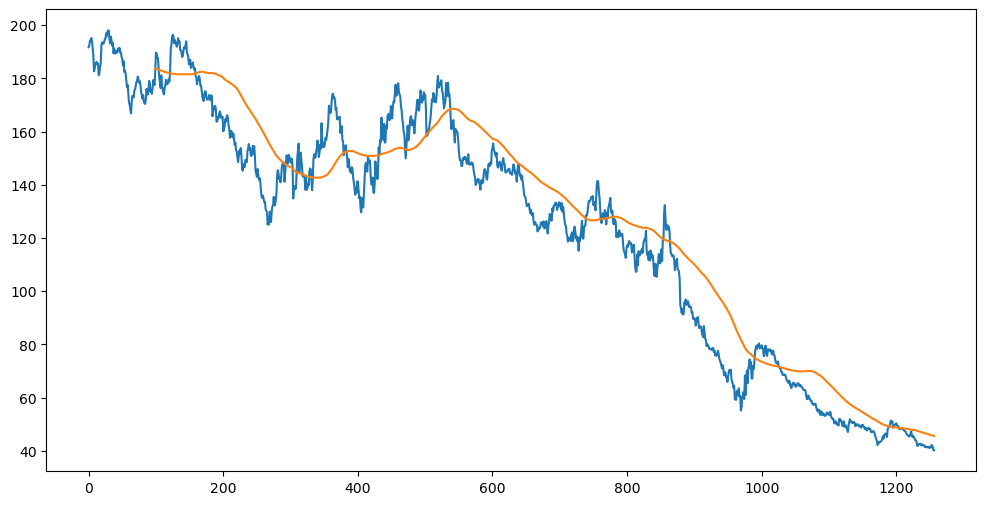

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100)

In [9]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1252    49.981306
1253    49.865350
1254    49.744877
1255    49.620342
1256    49.499520
Name: Close, Length: 1257, dtype: float64

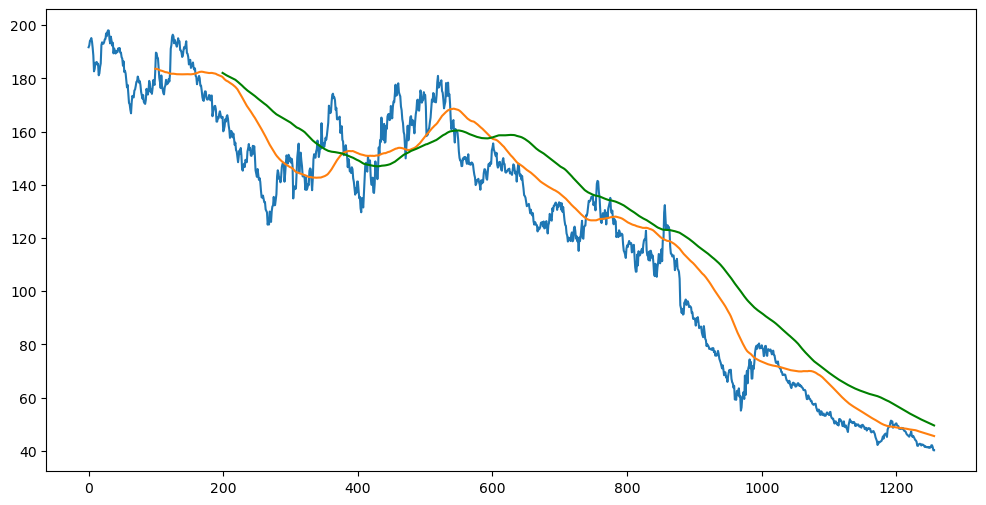

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100)
plt.plot(ma200,'g')

In [11]:
df.shape


(1257, 5)

In [12]:
#Splitting data into Training and Testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.50)])                           #70%
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.50):int(len(df))])                 #30%
print(data_training.shape)
print(data_testing.shape)

(628, 1)
(629, 1)


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [14]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[9.12710357e-01],
       [9.22150773e-01],
       [9.46093857e-01],
       [9.50608838e-01],
       [9.59912437e-01],
       [9.42262963e-01],
       [9.10384458e-01],
       [8.70296894e-01],
       [7.88890409e-01],
       [8.01888083e-01],
       [8.33219319e-01],
       [8.28704337e-01],
       [8.36913394e-01],
       [8.22547544e-01],
       [8.28293884e-01],
       [7.68367766e-01],
       [7.78355452e-01],
       [8.10370776e-01],
       [8.29388425e-01],
       [9.23655767e-01],
       [9.38021617e-01],
       [9.32138459e-01],
       [9.30770283e-01],
       [9.38295252e-01],
       [9.53071556e-01],
       [9.55123820e-01],
       [9.83992338e-01],
       [9.69626488e-01],
       [9.92611848e-01],
       [1.00000000e+00],
       [9.97947736e-01],
       [9.53482008e-01],
       [9.32548912e-01],
       [9.67163771e-01],
       [9.47462033e-01],
       [9.20782597e-01],
       [9.35832535e-01],
       [8.81242304e-01],
       [9.06006294e-01],
       [8.88356820e-01],


In [15]:
x_train=[]       #100 days data which we use to predict y_train
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)
    



In [16]:
#ML Model

In [17]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential


In [18]:
model = Sequential()
model.add(LSTM(units =50, activation = 'relu',return_sequences = True,
                input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences =True))
model.add(Dropout(0.3))



model.add(LSTM(units=80,activation='relu',return_sequences =True))
model.add(Dropout(0.4))


model.add(LSTM(units=60,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))





In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 60)                3

In [20]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
17/17 [==============================] - 3s 105ms/step - loss: 0.1294
Epoch 2/50
17/17 [==============================] - 2s 102ms/step - loss: 0.0390
Epoch 3/50
17/17 [==============================] - 2s 95ms/step - loss: 0.0319
Epoch 4/50
17/17 [==============================] - 2s 93ms/step - loss: 0.0281
Epoch 5/50
17/17 [==============================] - 2s 95ms/step - loss: 0.0258
Epoch 6/50
17/17 [==============================] - 2s 96ms/step - loss: 0.0237
Epoch 7/50
17/17 [==============================] - 2s 98ms/step - loss: 0.0276
Epoch 8/50
17/17 [==============================] - 2s 97ms/step - loss: 0.0217
Epoch 9/50
17/17 [==============================] - 2s 98ms/step - loss: 0.0210
Epoch 10/50
17/17 [==============================] - 2s 101ms/step - loss: 0.0236
Epoch 11/50
17/17 [==============================] - 2s 97ms/step - loss: 0.0206
Epoch 12/50
17/17 [==============================] - 2s 98ms/step - loss: 0.0206
Epoch 13/50
17/17 [===============

In [21]:
model.save('stock_model.keras')

In [22]:
past_100_days=data_training.tail(100)

In [23]:
final_df=past_100_days.append(data_testing,ignore_index=True)

/var/folders/t7/p_yg5zl11334dg33xvm__57h0000gn/T/ipykernel_33643/3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [24]:
final_df.head()

,Close
0,168.765
1,170.151
2,171.268
3,178.266
4,173.321


In [25]:
input_data=scaler.fit_transform(final_df)
input_data

array([[9.30193449e-01],
       [9.40218512e-01],
       [9.48297873e-01],
       [9.98915037e-01],
       [9.63147407e-01],
       [9.73317131e-01],
       [1.00000000e+00],
       [9.64811017e-01],
       [9.68557758e-01],
       [9.40507835e-01],
       [8.98389553e-01],
       [8.73297964e-01],
       [8.87142098e-01],
       [8.94425819e-01],
       [8.98244891e-01],
       [8.61905847e-01],
       [8.37168679e-01],
       [8.74021273e-01],
       [8.70202201e-01],
       [8.67453627e-01],
       [8.64068541e-01],
       [8.44821288e-01],
       [8.13306716e-01],
       [7.95419284e-01],
       [7.88207893e-01],
       [7.88142796e-01],
       [7.72844810e-01],
       [7.73206465e-01],
       [7.94044997e-01],
       [7.91383220e-01],
       [7.97437316e-01],
       [7.93538681e-01],
       [7.97372218e-01],
       [7.86768509e-01],
       [7.79123133e-01],
       [7.85177229e-01],
       [8.05155023e-01],
       [7.78327493e-01],
       [7.81719812e-01],
       [7.76815777e-01],


In [26]:
input_data.shape

(729, 1)

In [27]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [28]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(629, 100, 1)
(629,)


In [29]:
#Making Predictions

y_predicted=model.predict(x_test)

y_predicted.shape


20/20 [==============================] - 1s 26ms/step


(629, 1)

In [30]:
scaler.scale_

array([0.00723309])

In [31]:
scale_factor=1/0.0105229
y_predicted=y_predicted*scale_factor
y_test=y_test *scale_factor

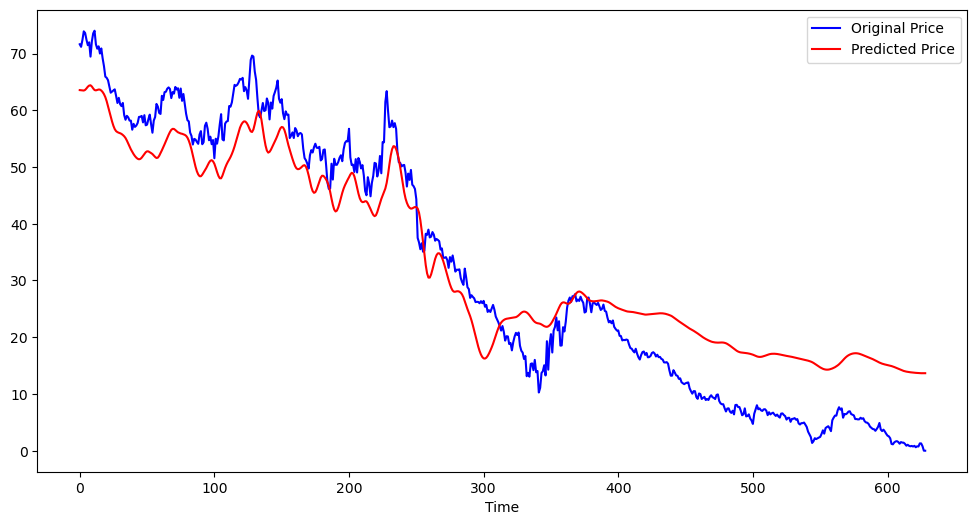

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Use the 'figsize' parameter to set the figure size

plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')

# Additional plot settings or annotations can be added here

plt.legend()  # Add legend if necessary
plt.show()
